<a href="https://colab.research.google.com/github/danielbauer1979/FI830/blob/main/FIN830_HW6_ML_Approach_to_Pricing_Options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from math import sqrt, exp
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

## Random Forest Model

Note: This notebook is based on work from Yanhui Shen (a former MSFE student). Data is from her as well.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Call_Data.xlsx to Call_Data.xlsx


In [ ]:
# Load dataset from local directory
call_data = pd.read_excel('Call_Data.xlsx')
call_data #preview

,Date,Strike,Call price,Time-to-Maturity,S&P 500 Index,VIX Index,3-m VIX future,6-m VIX future,3-m treasury yield,6-m treasury yield,12-m treasury yield,2-y treasury yield
0,2023-05-12,3800,324.45,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98
1,2023-05-12,4100,25.75,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98
2,2023-05-12,3900,202.90,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98
3,2023-05-12,4300,0.05,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98
4,2023-05-12,4000,108.34,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...
100,2023-05-08,3865,318.30,53,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00
101,2023-05-08,3980,227.62,53,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00
102,2023-05-08,4005,228.15,74,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00
103,2023-05-08,2850,1306.19,74,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00


In [ ]:
# Load dataset from github
dat_url = "https://raw.githubusercontent.com/danielbauer1979/FI830/main/FI830_Call_Data.csv"
dat2 = pd.read_csv(dat_url)
dat2 # note that there are a few NA columns here, make sure to drop these or exclude from the set of independent variables

,Date,Strike,Call price,Time-to-Maturity,S&P 500 Index,VIX Index,3-m VIX future,6-m VIX future,3-m treasury yield,6-m treasury yield,12-m treasury yield,2-y treasury yield,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,5/12/23,3800,324.45,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98,NaN,NaN,NaN,NaN
1,5/12/23,4100,25.75,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98,NaN,NaN,NaN,NaN
2,5/12/23,3900,202.90,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98,NaN,NaN,NaN,NaN
3,5/12/23,4300,0.05,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98,NaN,NaN,NaN,NaN
4,5/12/23,4000,108.34,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,5/8/23,3865,318.30,53,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00,NaN,NaN,NaN,NaN
101,5/8/23,3980,227.62,53,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00,NaN,NaN,NaN,NaN
102,5/8/23,4005,228.15,74,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00,NaN,NaN,NaN,NaN
103,5/8/23,2850,1306.19,74,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00,NaN,NaN,NaN,NaN


In [ ]:
# drop NA columns
dat2 = dat2.iloc[:,:call_data.shape[1]]
dat2

,Date,Strike,Call price,Time-to-Maturity,S&P 500 Index,VIX Index,3-m VIX future,6-m VIX future,3-m treasury yield,6-m treasury yield,12-m treasury yield,2-y treasury yield
0,5/12/23,3800,324.45,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98
1,5/12/23,4100,25.75,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98
2,5/12/23,3900,202.90,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98
3,5/12/23,4300,0.05,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98
4,5/12/23,4000,108.34,3,4124.08,17.030001,178871.79,24111.60,5.08,4.93,4.57,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...
100,5/8/23,3865,318.30,53,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00
101,5/8/23,3980,227.62,53,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00
102,5/8/23,4005,228.15,74,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00
103,5/8/23,2850,1306.19,74,4138.12,16.980000,180543.03,24423.79,5.15,4.90,4.60,4.00


In [ ]:
# split data into train and test sets
np.random.seed(33)
train, test = train_test_split(call_data, test_size = 0.2) # results should be the same if we use dat2 instead of call_data
# choose independent and dependent variables
X_train = train.drop(columns = ['Call price','Date']).values
y_train = train['Call price'].values
X_test = test.drop(columns = ['Call price','Date']).values
y_test = test['Call price'].values

In [ ]:
# Fit a random forest model using the training set
call_rf = RandomForestRegressor(n_estimators=21, random_state=33, criterion="absolute_error")
call_rf.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=21,
                      random_state=33)

In [ ]:
# Prediction using test set
call_rf_test_pred = call_rf.predict(X_test)
# check how this RF model performs
print("R2 (explained variance):", round(metrics.r2_score(y_test, call_rf_test_pred), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, call_rf_test_pred)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, call_rf_test_pred))))

R2 (explained variance): 0.98
Mean Absolute Error (Σ|y-pred|/n): 60
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 85


In [ ]:
# could also check the performance of the model on the training set
call_rf_train_pred = call_rf.predict(X_train)
print("R2 (explained variance):", round(metrics.r2_score(y_train, call_rf_train_pred), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_train, call_rf_train_pred)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_train, call_rf_train_pred))))

# here the results are similar, meaning that the RF model is likely not overfitting and generalizes well to unobserved data

R2 (explained variance): 0.98
Mean Absolute Error (Σ|y-pred|/n): 28
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 77


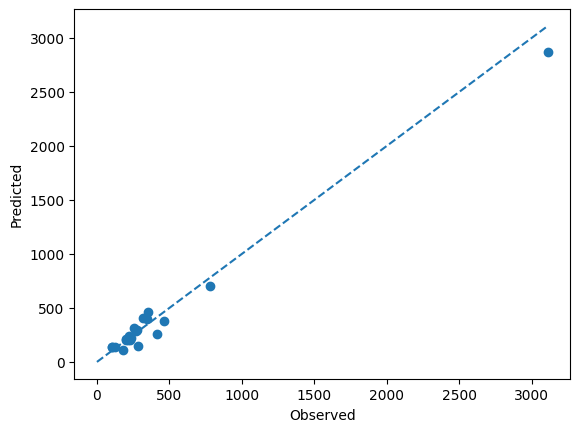

In [ ]:
# A graphical view of predicted vs observed call option prices
plt.scatter(y_test,call_rf_test_pred)
plt.plot([i for i in range(int(max(y_test)+1))],[i for i in range(int(max(y_test)+1))],'--')
plt.ylabel("Predicted"), plt.xlabel('Observed')
plt.show()